# Import Libraries

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.filterwarnings("ignore")

# Read & Split Data

In [327]:
data = pd.read_csv("/content/data/bank-full.csv", sep=';')

In [328]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [329]:
y = data['y']
X = data.drop("y", axis=1)

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 21664 to 35057
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.1+ MB


In [331]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 31260 to 25017
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.8+ MB


In [332]:
X_train.shape, X_test.shape

((31647, 16), (13564, 16))

# Data Exploration

In [333]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
21664,45,blue-collar,married,primary,no,487,yes,no,cellular,19,aug,110,4,-1,0,unknown
28136,33,services,married,secondary,no,360,yes,no,cellular,29,jan,103,1,185,13,other
16086,27,technician,single,secondary,no,285,no,no,cellular,22,jul,139,1,-1,0,unknown
29719,26,technician,single,tertiary,no,822,no,no,telephone,3,feb,371,3,-1,0,unknown
35769,37,blue-collar,single,secondary,no,180,yes,no,cellular,8,may,114,2,-1,0,unknown


In [334]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
31260,59,management,married,unknown,no,8674,no,no,cellular,5,mar,64,1,-1,0,unknown
35625,36,services,divorced,primary,no,418,yes,no,cellular,8,may,156,2,-1,0,unknown
44155,36,management,single,unknown,no,62,no,no,cellular,13,jul,311,1,91,2,success
1992,34,entrepreneur,divorced,tertiary,no,338,yes,no,unknown,9,may,162,2,-1,0,unknown
16973,58,retired,married,secondary,no,992,no,no,cellular,25,jul,46,1,-1,0,unknown


In [335]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [336]:
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [337]:
y_train.value_counts()

no     27932
yes     3715
Name: y, dtype: int64

(array([27932.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3715.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

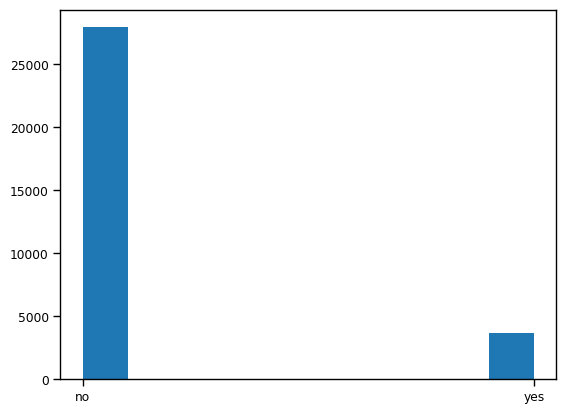

In [338]:
plt.hist(y_train)

In [339]:
y_train.value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: y, dtype: float64

In [340]:
X_train["age"].value_counts()

32    1421
34    1378
33    1375
31    1372
35    1340
      ... 
88       2
92       2
90       2
95       2
93       2
Name: age, Length: 76, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

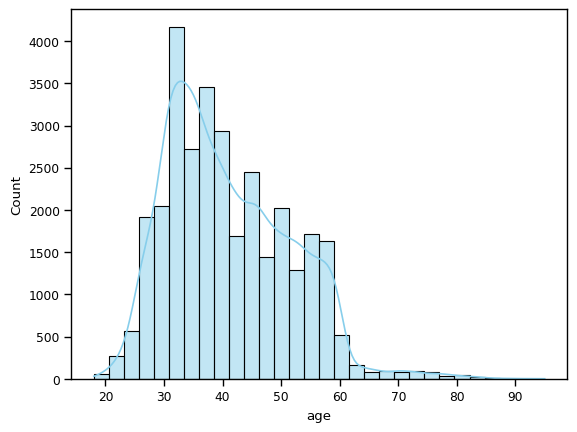

In [341]:
sns.histplot(X_train["age"], bins=30, kde=True, color='skyblue', edgecolor='black')

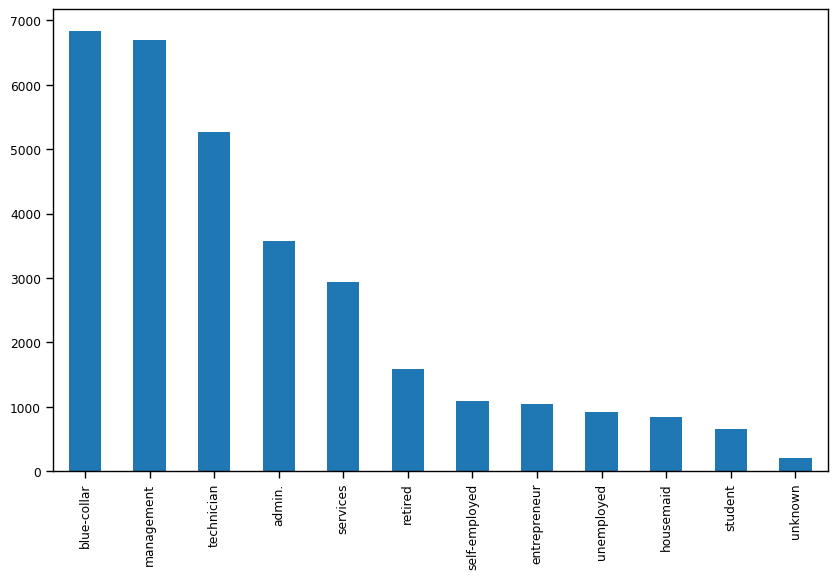

In [342]:
sns.set_context('paper')
X_train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [343]:
X_train['job'].value_counts()

blue-collar      6832
management       6700
technician       5269
admin.           3576
services         2931
retired          1591
self-employed    1089
entrepreneur     1046
unemployed        912
housemaid         846
student           648
unknown           207
Name: job, dtype: int64

In [344]:
X_train['marital'].value_counts()

married     19112
single       8929
divorced     3606
Name: marital, dtype: int64

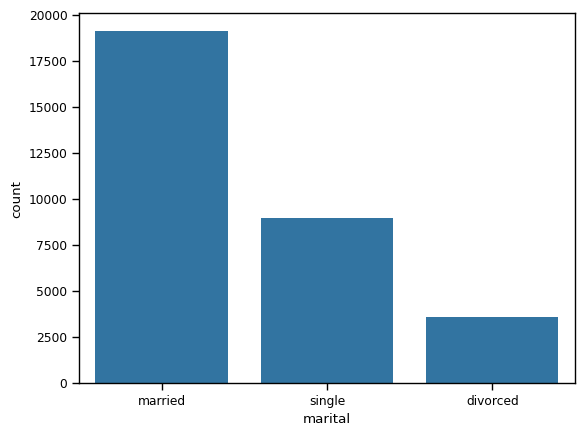

In [345]:
# plt.hist(X_train.marital)
sns.countplot(data=X_train, x='marital');


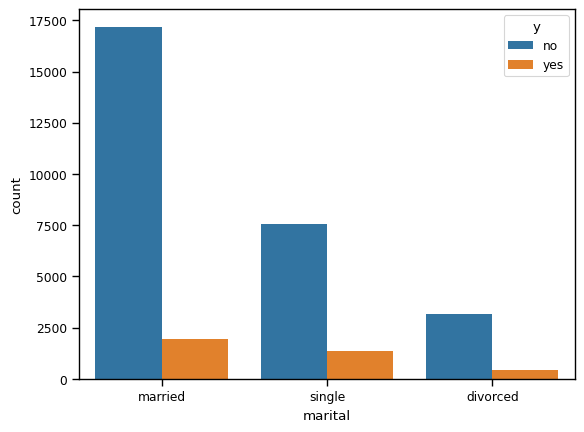

In [346]:
sns.countplot(data=X_train, x='marital', hue=y_train);

In [347]:
pd.crosstab(X_train['job'],y_train)

y,no,yes
job,,
admin.,3140,436
blue-collar,6339,493
entrepreneur,955,91
housemaid,775,71
management,5792,908
retired,1232,359
self-employed,962,127
services,2671,260
student,455,193


In [348]:
job = pd.crosstab(X_train['job'],y_train)
job_norm = job.div(job.sum(1).astype(float), axis=0)

In [349]:
job_norm

y,no,yes
job,,
admin.,0.878076,0.121924
blue-collar,0.927840,0.072160
entrepreneur,0.913002,0.086998
housemaid,0.916076,0.083924
management,0.864478,0.135522
retired,0.774356,0.225644
self-employed,0.883379,0.116621
services,0.911293,0.088707
student,0.702160,0.297840


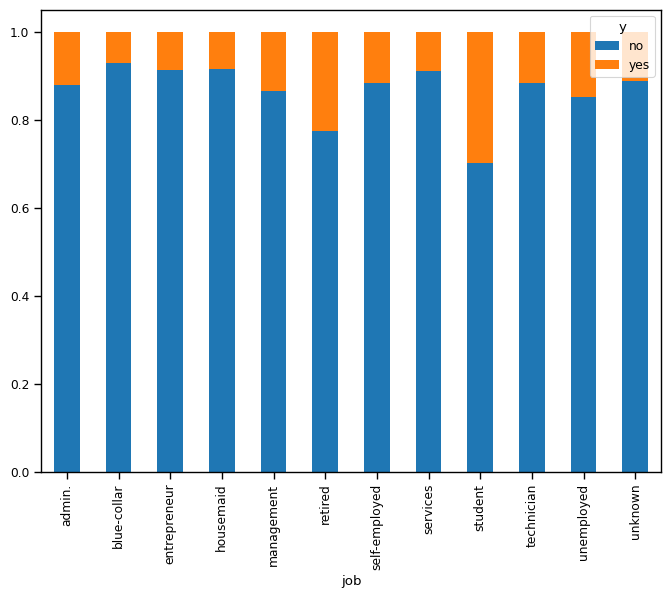

In [350]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

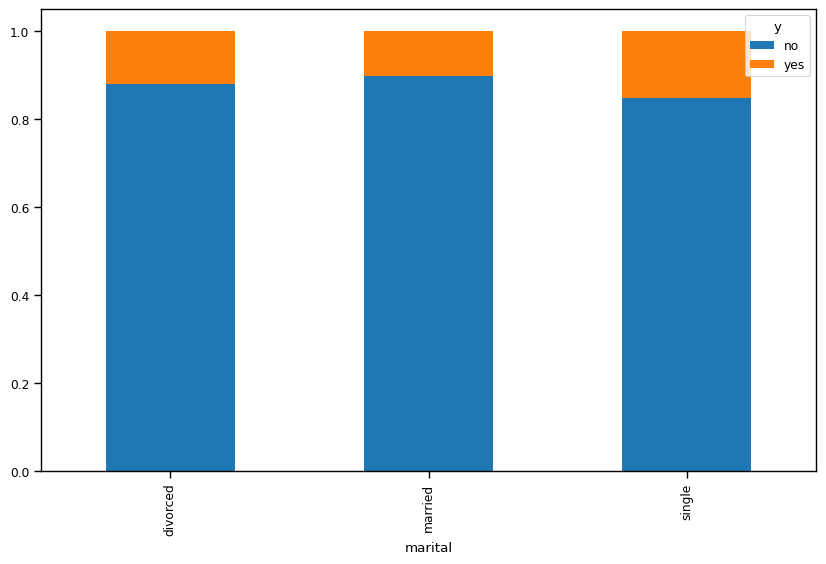

In [351]:
marital = pd.crosstab(X_train['marital'], y_train)
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm.plot.bar(stacked=True, figsize=(10,6));

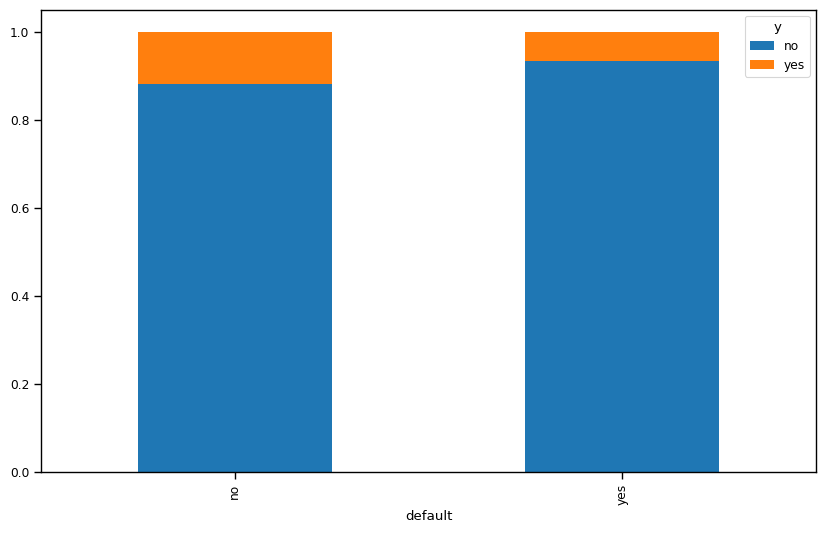

In [352]:
default = pd.crosstab(X_train['default'], y_train)
default_norm = default.div(default.sum(1).astype(float), axis=0)
default_norm.plot.bar(stacked=True, figsize=(10,6));

In [353]:
y_train.replace('no', 0,inplace=True)
y_train.replace('yes', 1,inplace=True)
y_test.replace('no', 0,inplace=True)
y_test.replace('yes', 1,inplace=True)

In [354]:
y_train

21664    0
28136    0
16086    0
29719    0
35769    0
        ..
41039    1
10262    0
2728     0
15451    1
35057    1
Name: y, Length: 31647, dtype: int64

In [355]:
train_correlation = X_train.corr()

<Axes: >

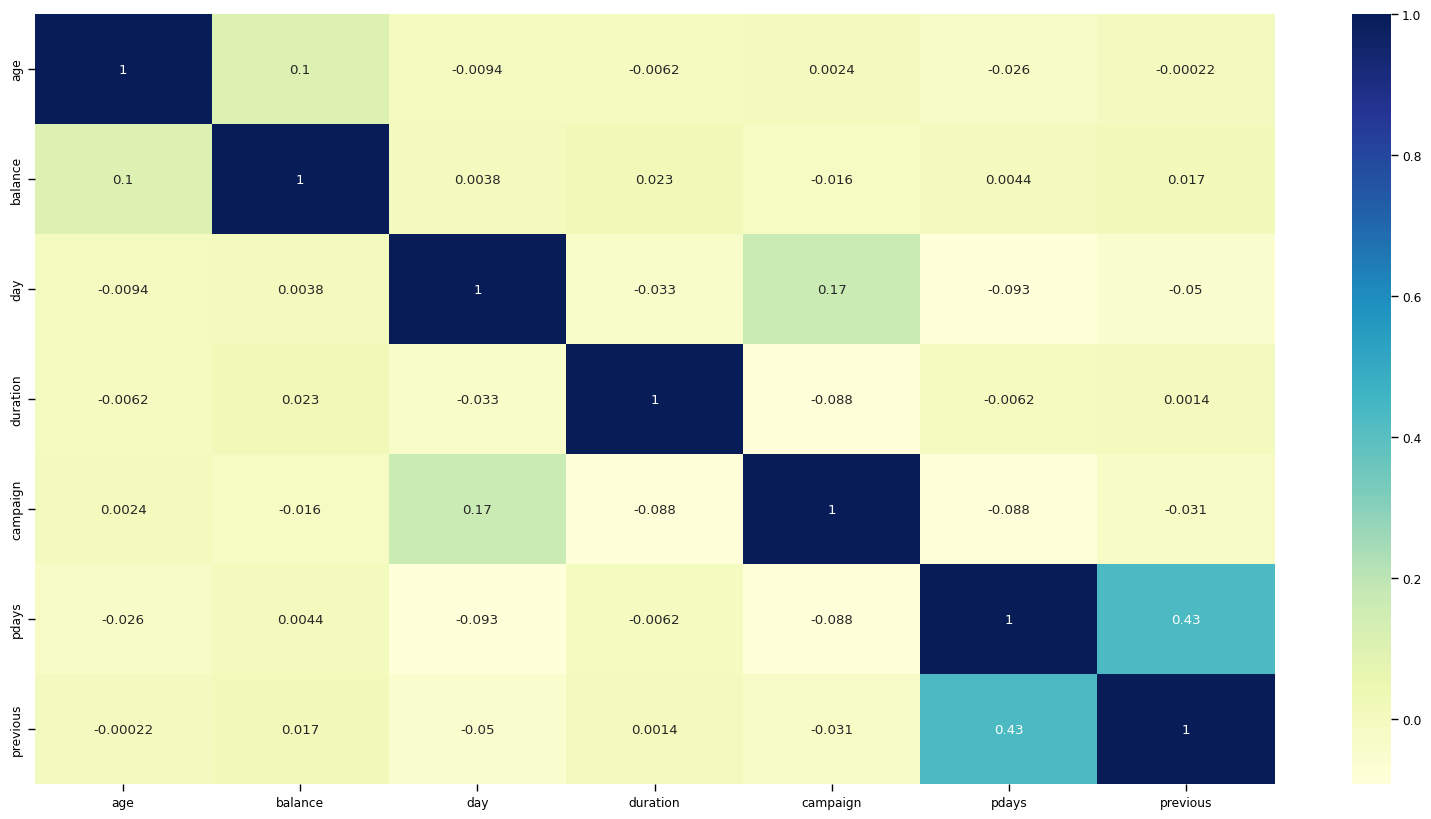

In [356]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train_correlation, annot=True, cmap='YlGnBu')

# Model Building

In [357]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [358]:
lreg = LogisticRegression()

In [359]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [360]:
pred = lreg.predict(X_test)

In [361]:
accuracy_score(y_test,pred)

0.8965644352698319

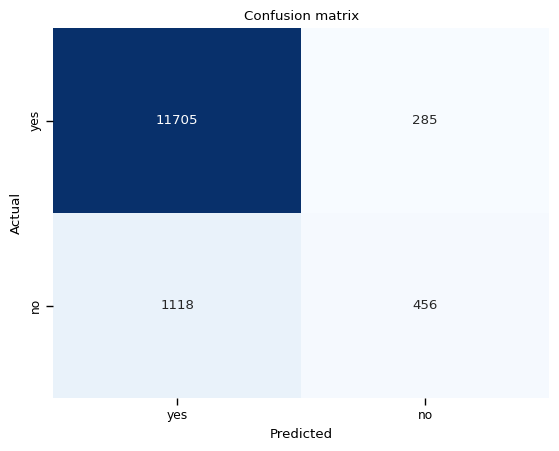

In [362]:
cm=confusion_matrix(y_test,pred)
labels=['yes','no']
plt.title('Confusion matrix')
sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [363]:
cm

array([[11705,   285],
       [ 1118,   456]])

In [364]:
#Calculating classification metrics
tn,fp,fn,tp=cm.ravel()
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
accuracy=(tp+tn)/(tp+tn+fp+fn)*100
F1score=(2*precision*recall/(precision+recall))

print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",F1score)
print("Accuracy:",accuracy)


Precision: 61.53846153846154
Recall: 28.970775095298603
F1 score: 39.395248380129594
Accuracy: 89.65644352698318
